In [1]:
import os
import sys

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from numpy import (
    array,
    float64,
)

sys.path.insert(1, '../lab1-histogram')
from utils import rgb2gray
from image_normalization import normalize_image
from utils2 import get_factors
from integral_image import compute_integral_image

In [2]:
input_image = array(rgb2gray(mpimg.imread("original_image.jpeg")), dtype=float64)

In [3]:
integral_image = compute_integral_image(input_image)
integral_image_square = compute_integral_image(input_image, 2)

In [6]:
grid_sizes_h = get_factors(input_image.shape[1])
print("Possible horizontal grid sizes")
print(grid_sizes_h)

Possible horizontal grid sizes: [2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 1000]


In [7]:
grid_sizes_v = get_factors(input_image.shape[0])
print("Possible vertical grid sizes")
print(grid_sizes_v)

Possible vertical grid sizes: [2, 3, 4, 5, 6, 10, 12, 15, 20, 25, 30, 50, 60, 75, 100, 125, 150, 250, 300, 375, 500, 750, 1500]


/home/helga/.local/share/virtualenvs/image_processing_and_recognition-LSsdEcBh/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


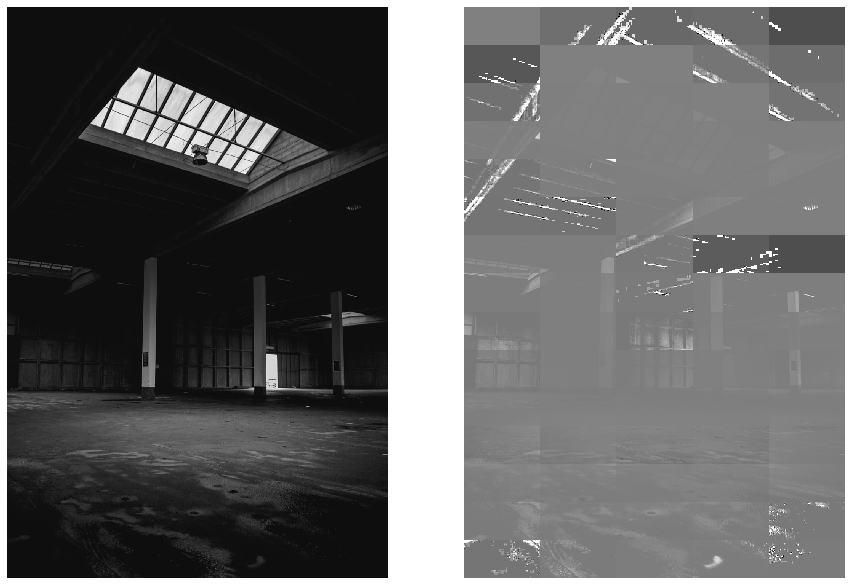

In [9]:
GRID_SIZE_H = 200
GRID_SIZE_V = 100
NEW_MEAN = 128
NEW_DISPERSION = 50

fig = plt.figure(figsize=(15, 15))
ax_orig = fig.add_subplot(121)
ax_norm = fig.add_subplot(122)

for ax in [ax_orig, ax_norm]:
    ax.set_axis_off()

ax_orig.imshow(input_image, cmap="gray")
normalized_image = normalize_image(
    input_image, integral_image, integral_image_square, GRID_SIZE_H, GRID_SIZE_V, NEW_MEAN, NEW_DISPERSION)
ax_norm.imshow(normalized_image, cmap="gray")